In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('gd_lr.csv')

In [3]:
data

,X,Y
0,0.00,0.00
1,0.22,0.22
2,0.24,0.58
3,0.33,0.20
4,0.37,0.55
5,0.44,0.39
6,0.44,0.54
7,0.57,0.53
8,0.93,1.00
9,1.00,0.61


AttributeError: module 'matplotlib.pyplot' has no attribute 'data'

In [5]:
X = data.iloc[:, 0]
Y = data.iloc[:, 1]

In [8]:
X

0    0.00
1    0.22
2    0.24
3    0.33
4    0.37
5    0.44
6    0.44
7    0.57
8    0.93
9    1.00
Name: X, dtype: float64

In [9]:
Y

0    0.00
1    0.22
2    0.58
3    0.20
4    0.55
5    0.39
6    0.54
7    0.53
8    1.00
9    0.61
Name: Y, dtype: float64

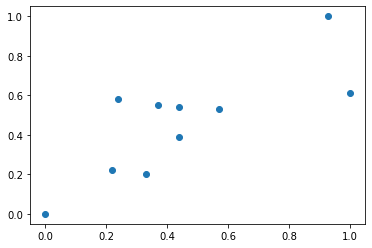

0.7029445323505824 0.1429038667204936


In [6]:
plt.scatter(X, Y)
plt.show()

b = 0.75
a = 0.45
L = 0.01  # The learning Rate
epochs = 600 # The number of iterations to perform gradient descent

for i in range(epochs): 
    Y_pred = b*X + a  # The current predicted value of Y
    D_b = -sum(X * (Y - Y_pred))  # Derivative wrt b
    D_a = -sum(Y - Y_pred)  # Derivative wrt a
    b = b - L * D_b  # Update b
    a = a - L * D_a  # Update a
    
print (b, a)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
import seaborn as sns
from scipy.stats import f_oneway
import scipy.stats as stats
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import graphviz
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind
from sklearn.metrics import accuracy_score
from scipy.stats import chi2_contingency
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn import svm

In [2]:
data=pd.read_csv('mobile_price (1).csv')

In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
data.shape

(2000, 21)

In [9]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
data.price_range.value_counts()

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

In [10]:
numerical=data.select_dtypes(include=np.number)
print(len(numerical.columns))
numerical.columns

21


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [11]:
categorical=data.select_dtypes(include=object)
print(len(categorical.columns))
categorical.columns

0


Index([], dtype='object')

Text(0.5, 1.0, 'Counts of Mobile Price Range')

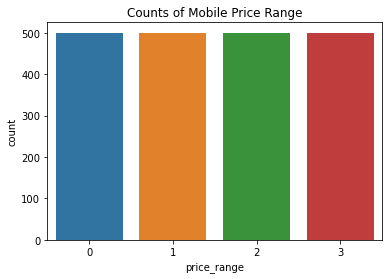

In [13]:
sns.countplot(x='price_range', data=data)
plt.title('Counts of Mobile Price Range')


(array([500.,   0.,   0., 500.,   0.,   0., 500.,   0.,   0., 500.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

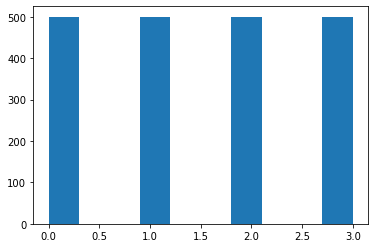

In [14]:
plt.hist(data.price_range)

Text(0.5, 1.0, 'Boxplot of Mobile Price Range')

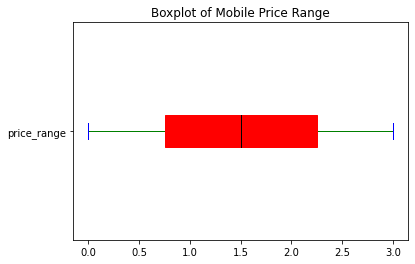

In [15]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'blue')
data.price_range.plot.box(color=props2, patch_artist = True, vert = False)
plt.title('Boxplot of Mobile Price Range')


In [16]:
data.battery_power.describe()

count    2000.000000
mean     1238.518500
std       439.418206
min       501.000000
25%       851.750000
50%      1226.000000
75%      1615.250000
max      1998.000000
Name: battery_power, dtype: float64

Text(0.5, 1.0, 'Histogram of battery_power')

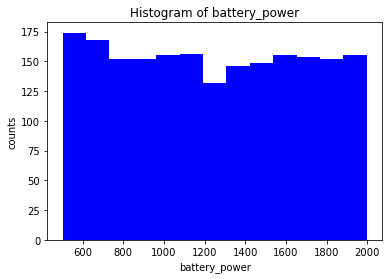

In [18]:
plt.hist(data.battery_power, bins='auto', facecolor='blue' )
plt.xlabel('battery_power')
plt.ylabel('counts')
plt.title('Histogram of battery_power')

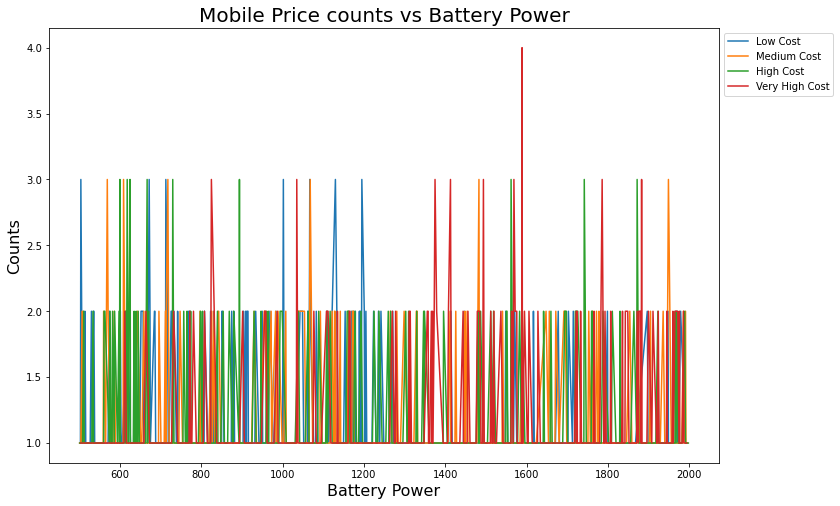

In [19]:
#Plot Battery Power vs Price_range
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.plot(data[data.price_range==0].groupby('battery_power')['price_range'].count())
plt.plot(data[data.price_range==1].groupby('battery_power')['price_range'].count())
plt.plot(data[data.price_range==2].groupby('battery_power')['price_range'].count())
plt.plot(data[data.price_range==3].groupby('battery_power')['price_range'].count())
plt.xlabel('Battery Power', size=16)
plt.ylabel('Counts', size=16)
plt.title('Mobile Price counts vs Battery Power', size=20)
plt.legend(labels = ('Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'),
           bbox_to_anchor=(1, 1), loc=2)
plt.show()

Text(0.5, 1.0, 'Boxplot of battery_power')

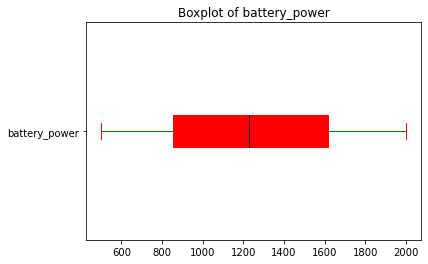

In [21]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
data.battery_power.plot.box(color=props2, patch_artist = True, vert = False)
plt.title('Boxplot of battery_power')

In [22]:
data.blue.value_counts()

0    1010
1     990
Name: blue, dtype: int64

In [23]:
data.groupby('price_range')['blue'].value_counts()

price_range  blue
0            0       257
             1       243
1            0       255
             1       245
2            0       257
             1       243
3            1       259
             0       241
Name: blue, dtype: int64

Text(0.5, 1.0, 'Barplot of blue')

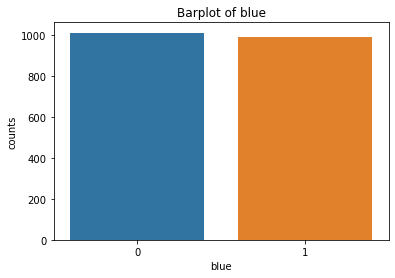

In [24]:

#Countplot/ Barplot
sns.countplot(x='blue', data=data)
plt.xlabel('blue')
plt.ylabel('counts')
plt.title('Barplot of blue')

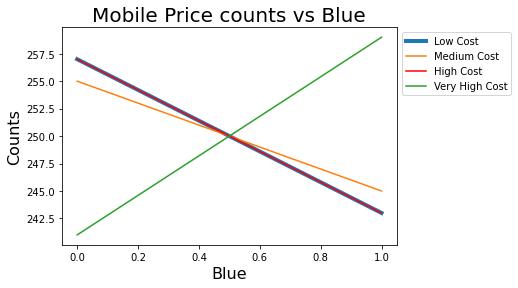

In [25]:
plt.plot(data[data.price_range==0].groupby('blue')['price_range'].count(),lw=4)
plt.plot(data[data.price_range==1].groupby('blue')['price_range'].count())
plt.plot(data[data.price_range==2].groupby('blue')['price_range'].count(), color='red')
plt.plot(data[data.price_range==3].groupby('blue')['price_range'].count())
plt.xlabel('Blue', size=16)
plt.ylabel('Counts', size=16)
plt.title('Mobile Price counts vs Blue', size=20)
plt.legend(labels = ('Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'),
           bbox_to_anchor=(1, 1), loc=2)
plt.show()


Text(0.5, 1.0, 'Boxplot of blue')

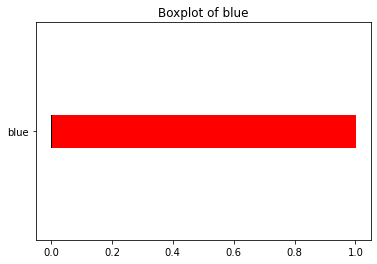

In [26]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
data.blue.plot.box(color=props2, patch_artist = True, vert = False)
plt.title('Boxplot of blue')

In [27]:

data.clock_speed.describe()

count    2000.000000
mean        1.522250
std         0.816004
min         0.500000
25%         0.700000
50%         1.500000
75%         2.200000
max         3.000000
Name: clock_speed, dtype: float64

In [28]:
data.clock_speed.value_counts() #26 Different values

0.5    413
2.8     85
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
2.0     67
1.5     67
1.9     65
0.7     64
2.9     62
1.8     62
1.0     61
1.7     60
2.2     59
2.4     58
0.8     58
0.9     58
1.2     56
2.6     55
2.7     55
1.1     51
3.0     28
Name: clock_speed, dtype: int64

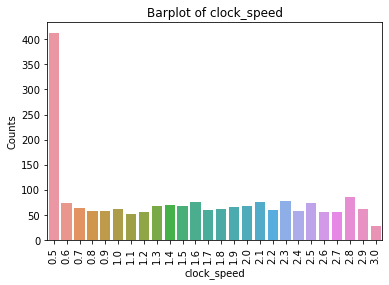

In [29]:
sns.countplot(x='clock_speed', data=data)
plt.xlabel('clock_speed')
plt.ylabel('Counts')
plt.title('Barplot of clock_speed')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Boxplot of Clock_speed')

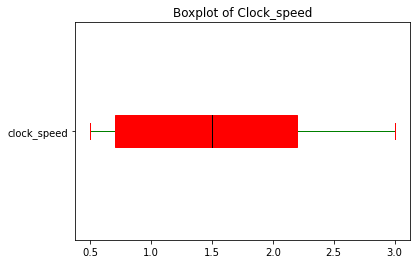

In [30]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
data.clock_speed.plot.box(color=props2, patch_artist = True, vert = False)
plt.title('Boxplot of Clock_speed')

In [31]:
data.dual_sim.value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

In [32]:
data.groupby('price_range')['dual_sim'].value_counts()

price_range  dual_sim
0            0           250
             1           250
1            1           255
             0           245
2            0           251
             1           249
3            1           265
             0           235
Name: dual_sim, dtype: int64

Text(0.5, 1.0, 'Barplot of dual_sim')

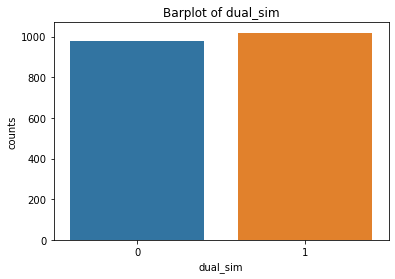

In [34]:
sns.countplot(x='dual_sim', data=data)
plt.xlabel('dual_sim')
plt.ylabel('counts')
plt.title('Barplot of dual_sim')

Text(0.5, 1.0, 'Boxplot of dual_sim')

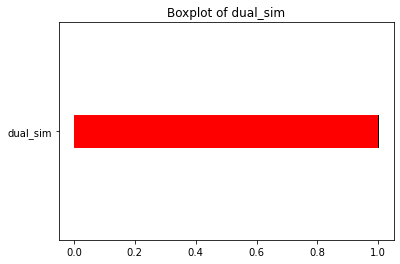

In [35]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
data.dual_sim.plot.box(color=props2, patch_artist = True, vert = False)
plt.title('Boxplot of dual_sim')

In [36]:
data.fc.describe()

count    2000.000000
mean        4.309500
std         4.341444
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        19.000000
Name: fc, dtype: float64

In [37]:
data.fc.value_counts() #20 Different values

0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: fc, dtype: int64

Text(0.5, 1.0, 'Barplot of Front Camera megapixels')

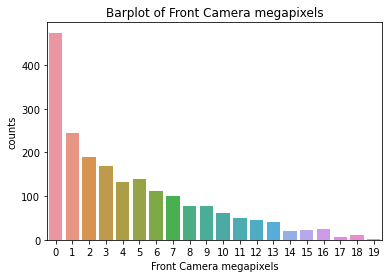

In [38]:
#Barplot/ Countplot
sns.countplot(x='fc', data=data)
plt.xlabel('Front Camera megapixels')
plt.ylabel('counts')
plt.title('Barplot of Front Camera megapixels')

Text(0.5, 1.0, 'Boxplot of Front Camera megapixels')

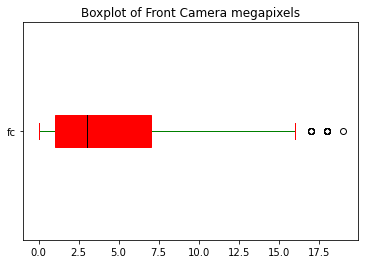

In [39]:
#Boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
data.fc.plot.box(color=props2, patch_artist = True, vert = False)
plt.title('Boxplot of Front Camera megapixels') 

In [40]:
iqr = data.fc.describe()['75%'] - data.fc.describe()['25%'] #6.0
up_lim = data.fc.describe()['75%']+1.5*iqr #16
len(data.fc[data.fc > up_lim])

18

In [41]:
for i in np.arange(16,19,1):
    outliers = len(data.fc[data.fc > i])
    print('At a limit of :', i, 'There are', outliers, 'outliers')

At a limit of : 16 There are 18 outliers
At a limit of : 17 There are 12 outliers
At a limit of : 18 There are 1 outliers


In [42]:
data.four_g.value_counts()

1    1043
0     957
Name: four_g, dtype: int64

In [43]:

data.groupby('price_range')['four_g'].value_counts()

price_range  four_g
0            1         259
             0         241
1            1         262
             0         238
2            0         253
             1         247
3            1         275
             0         225
Name: four_g, dtype: int64

Text(0.5, 1.0, 'Barplot of four_g')

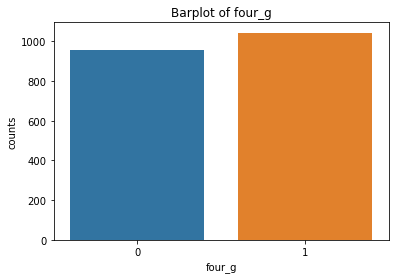

In [44]:
sns.countplot(x='four_g', data=data)
plt.xlabel('four_g')
plt.ylabel('counts')
plt.title('Barplot of four_g')

Text(0.5, 1.0, 'Boxplot of four_g')

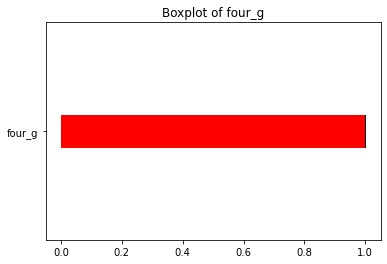

In [45]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
data.four_g.plot.box(color=props2, patch_artist = True, vert = False)
plt.title('Boxplot of four_g')


In [46]:
data.int_memory.describe()

count    2000.000000
mean       32.046500
std        18.145715
min         2.000000
25%        16.000000
50%        32.000000
75%        48.000000
max        64.000000
Name: int_memory, dtype: float64

In [47]:
data.int_memory.value_counts()

27    47
16    45
14    45
2     42
57    42
      ..
25    24
38    23
62    21
4     20
59    18
Name: int_memory, Length: 63, dtype: int64

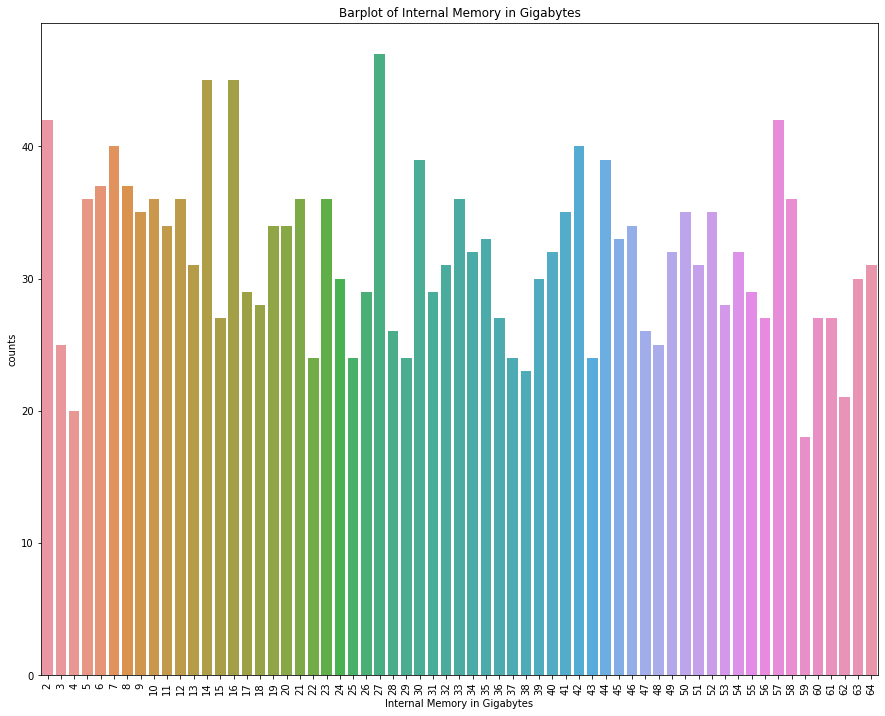

In [50]:
fig = plt.gcf() #gcf - Get the current figure
fig.set_size_inches(15,12 )
sns.countplot(x='int_memory', data=data)
plt.xlabel('Internal Memory in Gigabytes')
plt.ylabel('counts')
plt.title('Barplot of Internal Memory in Gigabytes')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Boxplot of Internal Memory in Gigabytes')

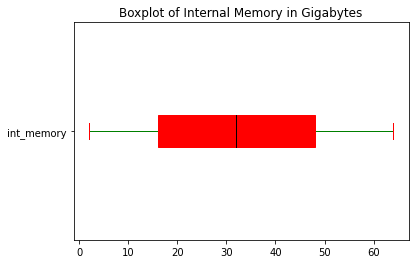

In [51]:
#Boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
data.int_memory.plot.box(color=props2, patch_artist = True, vert = False)
plt.title('Boxplot of Internal Memory in Gigabytes') 

In [52]:
#Value counts
data.px_width.value_counts() #1109 Different values

874     7
1247    7
1383    6
1463    6
1469    6
       ..
1427    1
850     1
1430    1
1431    1
1998    1
Name: px_width, Length: 1109, dtype: int64

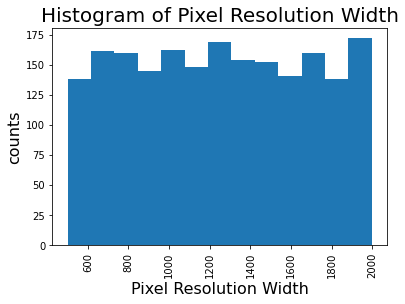

In [53]:

#Histogram
plt.hist(data.px_width, bins='auto')
plt.xlabel('Pixel Resolution Width', size=16)
plt.ylabel('counts', size=16)
plt.title('Histogram of Pixel Resolution Width', size=20)
plt.xticks(rotation=90)
plt.show()


Text(0.5, 1.0, 'Boxplot of Pixel Resolution Width')

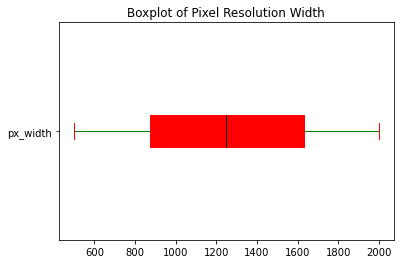

In [54]:

#Boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
data.px_width.plot.box(color=props2, patch_artist = True, vert = False)
plt.title('Boxplot of Pixel Resolution Width') #No outliers

Text(0.5, 1.0, 'Scatter plot b/w Pixel Height & Width with Price')

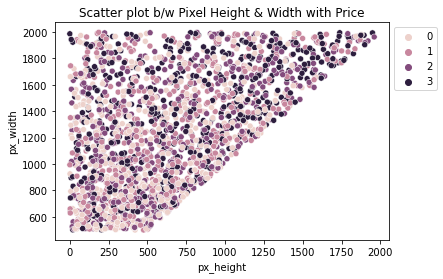

In [55]:
#Scatter plot - Pixel Height vs Width
sns.scatterplot(x='px_height', y='px_width', data=data, hue='price_range')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('Scatter plot b/w Pixel Height & Width with Price')


In [58]:
#Correlation
np.corrcoef(data.px_height, data.px_width)

array([[1.        , 0.51066442],
       [0.51066442, 1.        ]])

In [59]:
data.corr()['price_range']

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

In [64]:
data.shape


(2000, 21)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier


In [62]:
x = data.iloc[:,:-1]
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [65]:
y = data.iloc[:,-1]
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=123)


In [67]:

len(x_train) #1500
len(x_test) #500
len(y_train) #1500
len(y_test) #500

500

In [68]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
#Create Model with 300 trees

In [69]:
rfc = RandomForestClassifier(n_estimators=300)

In [70]:

#Fitting the model
mpr_rfc = rfc.fit(x_train, y_train)

In [71]:
#Prediction
y_predrfc = mpr_rfc.predict(x_test)

In [72]:
#Confusion Matrix & Report
pd.crosstab(y_test,y_predrfc, margins=True,rownames=['Actual'], colnames=['Predict'])

Predict,0,1,2,3,All
Actual,,,,,
0,116,3,0,0,119
1,9,109,10,0,128
2,0,13,113,11,137
3,0,0,10,106,116
All,125,125,133,117,500


In [73]:
#Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predrfc) #0.89


0.888

In [74]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predrfc))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       119
           1       0.87      0.85      0.86       128
           2       0.85      0.82      0.84       137
           3       0.91      0.91      0.91       116

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500



In [75]:
#Importance of variables
#Extract Feature importance
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': mpr_rfc.feature_importances_}).\
                    sort_values('importance', ascending=False)


In [76]:
#Display
fi.head()

,feature,importance
13,ram,0.476513
0,battery_power,0.074279
11,px_height,0.057647
12,px_width,0.056374
8,mobile_wt,0.039231


In [77]:
#Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [78]:
gnb = GaussianNB()
mpr_gnb = gnb.fit(x_train,y_train)

In [79]:
#Prediction
y_predgnb = mpr_gnb.predict(x_test)
len(y_predgnb)

500

In [80]:

#Confusion Matrix & Report
pd.crosstab(y_test,y_predgnb, margins=True,rownames=['Actual'], colnames=['Predict'])

Predict,0,1,2,3,All
Actual,,,,,
0,112,7,0,0,119
1,10,96,22,0,128
2,0,24,93,20,137
3,0,0,13,103,116
All,122,127,128,123,500


In [81]:

#Confusion Matrix & Report
pd.crosstab(y_test,y_predgnb, margins=True,rownames=['Actual'], colnames=['Predict'])

Predict,0,1,2,3,All
Actual,,,,,
0,112,7,0,0,119
1,10,96,22,0,128
2,0,24,93,20,137
3,0,0,13,103,116
All,122,127,128,123,500


In [82]:
#Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predgnb) #0.808

0.808

In [83]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predgnb))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       119
           1       0.76      0.75      0.75       128
           2       0.73      0.68      0.70       137
           3       0.84      0.89      0.86       116

    accuracy                           0.81       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.81      0.81      0.81       500



In [84]:
#Assigning predictors & response variable as per important features give by
#Random forest

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [87]:
x = data.iloc[:,[0,8,11,12,13]]
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   battery_power  2000 non-null   int64
 1   mobile_wt      2000 non-null   int64
 2   px_height      2000 non-null   int64
 3   px_width       2000 non-null   int64
 4   ram            2000 non-null   int64
dtypes: int64(5)
memory usage: 78.2 KB


In [88]:
y = data.iloc[:,-1]
y


0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [89]:

#Splitting data into training and test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=123)


In [90]:
len(x_train) #1500
len(x_test) #500
len(y_train) #1500
len(y_test) #500


500

In [91]:
#Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
mpr_gnb = gnb.fit(x_train,y_train)

In [92]:
#Prediction
y_predgnb = mpr_gnb.predict(x_test)
len(y_predgnb)


500

In [93]:
#Confusion Matrix & Report
pd.crosstab(y_test,y_predgnb, margins=True,rownames=['Actual'], colnames=['Predict'])

Predict,0,1,2,3,All
Actual,,,,,
0,111,8,0,0,119
1,10,94,24,0,128
2,0,24,91,22,137
3,0,0,11,105,116
All,121,126,126,127,500


In [94]:

#Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predgnb) #0.802


0.802